# **Introduction to classification**

**Mentor: BOUZENA Ali** <br>
**Date: October 22, 2024** <br>
**Duration: 16:40 - 19:20** <br>

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train-test-split
from sklearn.model_selection import train_test_split

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# dataset
from sklearn.datasets import load_iris

# the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Loading the dataset**

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0: Setosa, 1: Versicolor, 2: Virginica)

df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])
# sns.pairplot(df, hue="species", markers=["o", "s", "D"])
# plt.suptitle("Pairplot of Iris Features", y=1.02)
# plt.show()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


![understanding the flower](iris.svg)

## **1. Logistic Regression**

### **Making it a binary classification**

In [4]:
# To make this a binary classification (Virginica vs. non-Virginica), we modify the target labels
# Set y to 1 for Iris-Virginica, and 0 for the other classes
y_binary = (y == 2).astype(int)

df = pd.DataFrame(data=np.c_[X, y_binary], columns=iris.feature_names + ['species'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


### **Spliting the data**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 105
Test set size: 45


### **Training the model**

In [6]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### **Making predection**

In [8]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0])

## **2. K-Nearest Neighbors**

### Splitting the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 105
Test set size: 45


### **Training the model**

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)  # Using k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Making predection**

In [11]:
y_pred = knn.predict(X_test)

In [33]:
# Step 5: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## **3. Metrics**

Accuracy: 1.00


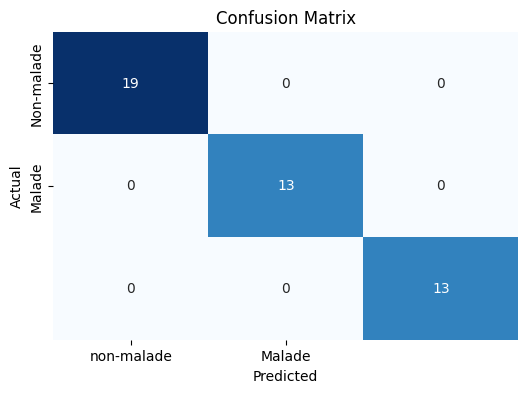

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/var/folders/7k/ptjzh1gd5bv6mgcx8fs1b3f40000gn/T/ipykernel_1402/456918945.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


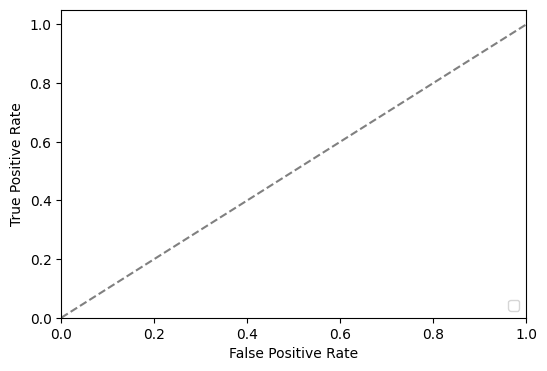

In [12]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['non-malade', 'Malade'], yticklabels=['Non-malade', 'Malade'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report (Text output)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()